In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import special

In [55]:
dir = "/home/michel/Documents/Minimal/build/collisions/cart"

# t x y z vx vy vz
data = np.loadtxt(f'{dir}/{4}.dat')
x = data[:,2]
y = data[:,3]
z = data[:,4]

In [56]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [63]:
dir = '/home/michel/Documents/Minimal/build/collisions'

%matplotlib qt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(1, 50):
	data = np.loadtxt(f'{dir}/{i}.dat')
	r = data[:,1]
	q = data[:,2]
	z = data[:,3]

	# print(i, np.max(z))

	if i != 30:
		ax.plot(r * np.cos(q), r * np.sin(q) , z)		

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()	

This one form above doesn't make sense for the tf = 1200, dt=0.00001, nskip=200, obs_skip=20000 because in only 1.2 the ion slows down to ~zero, and that is, in this case  data points

In [6]:
dir = "/home/michel/Documents/Minimal/build/dispersion_only/car"

%matplotlib qt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array([])
y = np.array([])
z = np.array([])


for i in range(1, 10):	
	data = np.loadtxt(f'{dir}/{i}.dat')
	
	x = data[:, 4]
	y = data[:, 5]
	z = data[:, 6]
	# z = data[:,3]

	ax.plot(x, y, z)		

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_aspect('auto', adjustable='box')

plt.show()	

Now a simulation with just dispersion

In [62]:
%matplotlib qt

dir = '/home/michel/Documents/Minimal/build/dispersion'


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

vr = np.array([])
vq = np.array([])
vz = np.array([])
q = np.array([])


for i in range(1, 99):
	if i == 30: continue
	
	data = np.loadtxt(f'{dir}/{i}.dat')
	vr = np.append(vr, data[-1, 4])
	vq = np.append(vq, data[-1, 5])
	vz = np.append(vz, data[-1, 6])
	q = np.append(q, data[-1, 2])
	# z = data[:,3]

vx = vr * np.cos(q) - vq * np.sin(q)
vy = vr * np.sin(q) + vq * np.cos(q)

# ax.scatter(vx, vy)		
# ax.scatter(vx, vz)
# ax.scatter(vy, vz)

v2 = np.square(vx) + np.square(vy) + np.square(vz)
print(f'<v^2> = {np.mean(v2)} standar deviation {np.std(v2)}')

print(f'means:\nvx = {np.mean(vx)}\nvy = {np.mean(vy)}\nvz = {np.mean(vz)}')

ax.scatter(vx, vy, vz)		

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# ax.set_aspect('equal', adjustable='box')

plt.show()

<v^2> = 0.0015425906584521148 standar deviation 0.0013796561761603135
means:
vx = -0.0003899982846019612
vy = -0.0021588598880502765
vz = -0.0011946550927835053


In [58]:
# prepare to continue simulations

dir = '/home/michel/Documents/Minimal/build/dispersion_only'

with open(f'{dir}/initial_conditions.dat', 'w') as file:
	for i in range(1, 100):
		data = np.loadtxt(f'{dir}/{i}.dat')[-1]
		line = ""
		for x in data:
			line += str(x) + ' '
		file.write(line + '\n')


### Dispersion difusion coefficient

In [107]:
dir = '/home/michel/Documents/Minimal/build/dispersion_only/everytime/cart'

data = np.loadtxt(f'{dir}/1.dat')
vx = data[:,4]
vy = data[:,5]
vz = data[:,6]

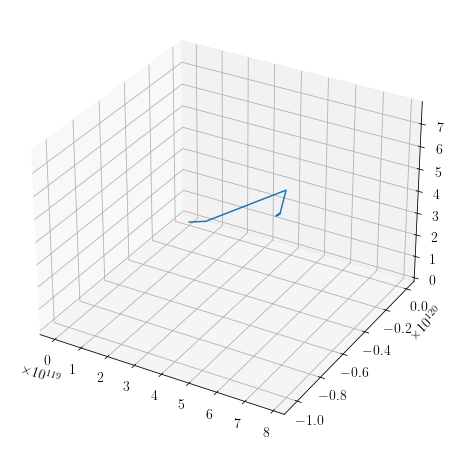

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(vx, vy, vx)

plt.show()

In [27]:
vs = np.transpose(np.array([vx, vy, vz]))

In [37]:
def mean_sqr_diff(vs):
	ans = []
	st_dev = []

	for n in range(len(vs)):
		sqr_diff = []

		for i in range(len(vs) - n):
			diff = vs[i + n] - vs[i]
			sqr_diff.append(np.dot(diff, diff))
		
		ans.append(np.mean(sqr_diff))
		st_dev.append(np.std(sqr_diff))
	
	return np.array(ans), np.array(st_dev)


In [47]:
msd, msd_std = mean_sqr_diff(vs)

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Sans Serif"],
		"font.size": 14
		})

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)

dt = 0.0186
t = np.arange(0, len(msd)) * dt

ax.plot(t, msd)
ax.grid()

ax.set_xlabel('$\Delta t\ [s]$', fontsize=16)
ax.set_ylabel('$\langle \Delta \\vec{v} \Delta \\vec{v} \\rangle \ [v_0^2]$', fontsize=16)

plt.show()

In [92]:
vmods = [np.dot(x, x) for x in vs]

In [94]:
np.mean(vmods)

5.458416255674037

### Perpendicular and parallel separatelly

In order to separate parallel and perpendicular the average of vector in the range of the difference will be taken as the effective velocity direction 

In [152]:
def mean_sqr_diff_perp_and_par(vs):
	sqr_diff_par = [[] for i in range(len(vs))]
	sqr_diff_perp = [[] for i in range(len(vs))]

	for start in range(len(vs)):

		v_sum = vs[start]

		for stop in range(start, len(vs)):

			v_sum += vs[stop]

			e_mean = v_sum / np.sqrt(np.dot(v_sum, v_sum))

			diff = vs[stop] - vs[start]
			diff_par = np.dot(diff, e_mean) # scalar
			diff_perp = np.cross(diff, e_mean) # vector

			sqr_diff_par[stop - start].append(diff_par ** 2)
			sqr_diff_perp[stop - start].append(np.dot(diff_perp, diff_perp))

	diff_par = np.array(sqr_diff_par, dtype='object')
	diff_perp = np.array(sqr_diff_perp, dtype='object')

	mean = np.vectorize(np.mean)
	std = np.vectorize(np.std)

	return mean(diff_par), mean(diff_perp), std(diff_par), std(diff_perp)

# Dont use this ^^^^

too slow, made a compiled C++ version

In [160]:
msd_par, msd_perp, std_par, st_perp = mean_sqr_diff_perp_and_par(vs)

In [161]:
np.savetxt('msd_par.dat', msd_par)
np.savetxt('msd_perp.dat', msd_perp)
np.savetxt('std_par.dat', std_par)
np.savetxt('std_perp.dat', st_perp)

In [163]:
fig = plt.figure()
ax = fig.add_subplot(111)

dt = 0.0186
t = np.arange(0, len(msd_perp)) * dt

ax.plot(t, msd_perp, label='perpendicular')
# ax.plot(t, msd_par, label='parallel')
ax.grid()

ax.set_xlabel('$\Delta t\ [s]$', fontsize=16)
ax.set_ylabel('$\langle \Delta \\vec{v} \Delta \\vec{v} \\rangle \ [v_0^2]$', fontsize=16)

plt.legend()

plt.show()

# Dispersion analysis

In [164]:
dir = '/home/michel/Documents/Minimal/build/dispersion_only'
filename = 'mean_sqr_diff.dat'

data = np.loadtxt(f'{dir}/{filename}')
t = data[:,0]
msd_par = data[:,1]
msd_perp = data[:,2]
mean_v = data[:,3]

In [184]:
%matplotlib qt

fig = plt.figure()
ax = fig.add_subplot(111)


ax.plot(t, msd_perp, label='$\langle \Delta \\vec{v}_\perp \Delta \\vec{v}_\perp \\rangle/v_0^2$')
ax.plot(t, msd_par, label='$\langle \Delta \\vec{v}_{||} \Delta \\vec{v}_{||} \\rangle/v_0^2$')
ax.plot(t, mean_v, label='$\langle v\\rangle/v_0$')
ax.grid()

ax.set_xlabel('$\Omega_0 \Delta t$', fontsize=16)
# ax.set_ylabel('$\langle \Delta \\vec{v} \Delta \\vec{v} \\rangle/v_0^2$', fontsize=16)
plt.legend(fontsize=16)

plt.rcParams['figure.figsize'] = [12, 8]

plt.savefig('dispersion.pdf')
plt.show()

## Dispersion coefficients vs velocity

In [3]:
# constants
e = 1.602e-19
epsilon0 = 8.854e-12
me = 9.109e-31

# values
v0 = 1.84142e7
dt = 93e-3 * 0.002

q1 = e
q2 = e
ma = 1836 * me
nb = 1e20
lnLambda = 17.5
vsb = 1.61029



In [4]:
def G(x):
	return (special.erf(x) - 2 * x * np.exp(-x**2) / np.sqrt( np.pi )) / (2 * x**2)

In [5]:
Ad = q1**2 * q2 ** 2 * nb * lnLambda  / (2 * np.pi * epsilon0**2 * ma**2) 

def D_par(v):
	return Ad * G(v/vsb) / (v * v0)

def D_perp(v):
	return Ad *(special.erf(v/vsb) - G(v/vsb)) / (v * v0)

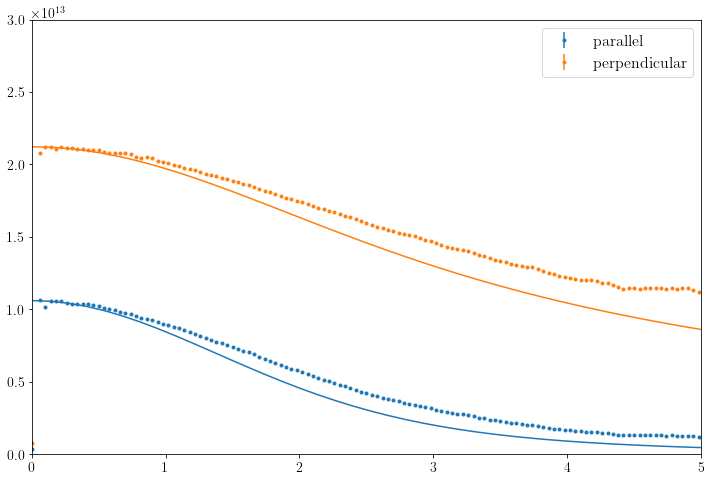

In [7]:
dir = '/home/michel/Documents/Minimal/build/dispersion_only/onlydv'
filename = 'process_disp_out.dat'

data = np.loadtxt(f'{dir}/{filename}')
v = data[:,0]
par = data[:,1] * v0**2 / dt
perp = data[:,2] * v0**2 / dt

verr = data[:,3]
parerr = data[:,4] * v0**2 / dt
perperr = data[:,5] * v0**2 / dt

nvs = data[:,6]

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0.01, 6.5)
d_par = D_par(x)
d_perp = D_perp(x)


ax.errorbar(v, par, yerr=parerr, fmt='.', label='parallel')
ax.errorbar(v, perp, yerr=perperr, fmt='.', label='perpendicular')
# ax.scatter(v, par, label='parallel')
# ax.scatter(v, perp, label='perpendicular')

# theoretical curves
ax.set_prop_cycle(None) # reset color cycle
ax.plot(x, d_par)
ax.plot(x, d_perp)

# ax.bar(v, - nvs * 5e12/8000, bottom=7.4e13, color='k')

# ax.grid()
plt.legend(fontsize=16)
plt.rcParams['figure.figsize'] = [12, 8]

ax.set_ylim([0, 3e13])
ax.set_xlim([0, 5])

# ax.set_xlabel('$\Delta t\ [s]$', fontsize=16)
# ax.set_ylabel('$\langle \Delta \\vec{v} \Delta \\vec{v} \\rangle \ [v_0^2]$', fontsize=16)

plt.show()

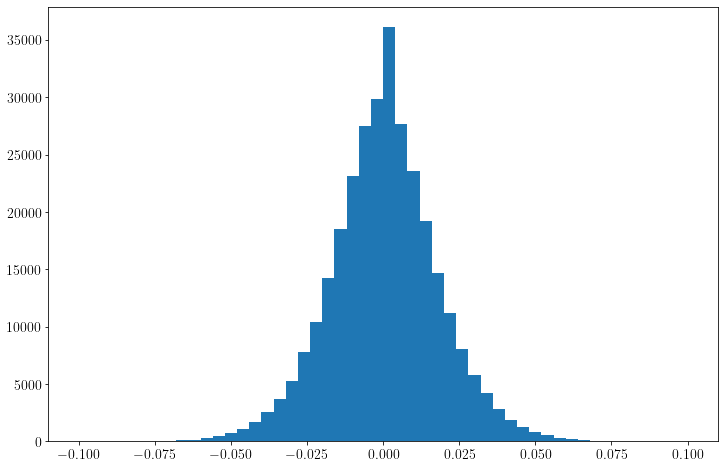

In [66]:
dir = '/home/michel/Documents/Minimal/build/dispersion_only/cart'
filename = 'differences.dat'

data = np.loadtxt(f'{dir}/{filename}')
par = data[:,0]

plt.hist(par, 50, range=(-0.1, 0.1))

plt.show()

In [32]:
%matplotlib qt

dir = '/home/michel/Documents/Minimal/build/dispersion_only/onlydv'

fig = plt.figure()
ax = fig.add_subplot(111)

for i in [1, 3, 4, 5, 6, 7, 8]:
	data = np.loadtxt(f'{dir}/{i}.dat', max_rows=300)
	vx = data[:,4]
	vy = data[:,5]

	ax.plot(vx, vy)

ax.scatter([0], [0], color='k', zorder=100)

ax.axis('off')
ax.set_aspect('equal', adjustable='box')

fig.savefig('vdisp.svg', bbox_inches='tight')



